# Analyzing carbon allocation profile

## Read dataframe with carbon allocation data

In [29]:
# assume already have the flux snapshots at desired cycle
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scarcc.preparation.find_directory import find_directory 
from scarcc.data_analysis import get_fs_change
from scarcc.data_analysis import (get_row_color_legend, relabel_clustermap, generate_row_colors, assign_plot_total_E_wide,
                                    get_fs_kde_plot, plot_kde)


data_directory = find_directory('Data', os.path.abspath(''))
carbon_allocation_E_wide = pd.read_csv(os.path.join(data_directory, 'carbon_allocation_E_wide_checkerboard.csv'), index_col=0)
carbon_allocation_E_wide.query('XG=="DG"').head()

,total_carbon_BIOMASS_Ec_iML1515_core_75p37M,total_carbon_EX_bulk_ac_e,total_carbon_EX_co2_e,total_carbon_EX_for_e,total_carbon_EX_glyclt_e,total_carbon_EX_hacolipa_e,total_carbon_EX_lcts_e,total_carbon_EX_met__L_e,total_carbon_Waste,percent_BIOMASS_Ec_iML1515_core_75p37M,...,percent_Waste,XG,Drug_comb_effect_coc,Drug_comb_effect_Emono,Drug_comb_effect_Smono,BM_consortia_frac_binned,plot_total_carbon_Waste,plot_total_carbon_EX_bulk_ac_e,plot_total_carbon_BIOMASS_Ec_iML1515_core_75p37M,plot_total_carbon_EX_co2_e
Gene_inhibition,,,,,,,,,,,,,,,,,,,,,
folP.folA_1.1,-3.970327,-4.657846,-3.482788,NaN,NaN,NaN,12.509550,0.077759,0.398589,-0.317384,...,-0.031863,DG,Synergistic,Additive,Additive,E,0.398589,4.657846,3.970327,3.482788
folP.folA_1.2,-2.786021,-14.046874,-4.051436,-4.444467,NaN,NaN,47.013448,0.054564,21.684651,-0.059260,...,-0.461244,DG,Synergistic,Synergistic,Synergistic,S,21.684651,14.046874,2.786021,4.051436
folP.folA_1.3,-1.354612,-11.476818,-5.213290,-1.670134,NaN,NaN,42.266922,0.026530,22.552068,-0.032049,...,-0.533563,DG,Synergistic,Synergistic,Synergistic,S,22.552068,11.476818,1.354612,5.213290
folP.folA_1.4,-0.151995,-10.678128,-5.035713,-0.699630,-1.895609,NaN,41.742689,0.002977,23.281615,-0.003641,...,-0.557741,DG,Synergistic,Synergistic,Synergistic,S,23.281615,10.678128,0.151995,5.035713
folP.folA_1.5,-0.017016,-10.593038,-5.011159,-0.595460,-2.115722,-0.000263,41.695097,0.000332,23.362439,-0.000408,...,-0.560316,DG,Additive,Synergistic,Additive,S,23.362439,10.593038,0.017016,5.011159


# 

calculate the difference in secretion fluxes quantity, normalized carbon content in flux, between double drug addition and single drug addition

In [30]:
gr_path = os.path.join(data_directory, 'gr_DG_checkerboard_normalized.csv')
fs_change = get_fs_change(gr_path=gr_path,carbon_allocation_E_wide=carbon_allocation_E_wide)
fs_change.head()

,percent_BIOMASS_Ec_iML1515_core_75p37M,percent_EX_bulk_ac_e,percent_EX_co2_e,percent_EX_for_e,percent_EX_glyclt_e,percent_EX_hacolipa_e,percent_EX_lcts_e,percent_EX_met__L_e,percent_Waste,Nth_gene,Drug_comb_effect_coc,Drug_comb_effect_Emono,Drug_comb_effect_Smono,BM_consortia_frac_binned,plot_total_carbon_Waste,plot_total_carbon_EX_bulk_ac_e,plot_total_carbon_BIOMASS_Ec_iML1515_core_75p37M,plot_total_carbon_EX_co2_e
Gene_inhibition,,,,,,,,,,,,,,,,,,
folP.folA_1.1,-0.017740,0.016451,0.003070,NaN,NaN,NaN,0.0,0.000347,-0.001781,First,Synergistic,Additive,Additive,E,0.398589,4.657846,3.970327,3.482788
folP.folA_1.1,-0.028156,0.005705,0.000058,NaN,NaN,NaN,0.0,0.000551,0.031863,Second,Synergistic,Additive,Additive,E,0.398589,4.657846,3.970327,3.482788
folP.folA_1.2,-0.268977,-0.065494,-0.189000,NaN,NaN,NaN,0.0,0.005268,0.428935,First,Synergistic,Synergistic,Synergistic,S,21.684651,14.046874,2.786021,4.051436
folP.folA_1.2,-0.275864,-0.057108,-0.189164,NaN,NaN,NaN,0.0,0.005403,0.427600,Second,Synergistic,Synergistic,Synergistic,S,21.684651,14.046874,2.786021,4.051436
folP.folA_1.3,-0.303075,-0.084360,-0.151998,NaN,NaN,NaN,0.0,0.005936,0.499919,First,Synergistic,Synergistic,Synergistic,S,22.552068,11.476818,1.354612,5.213290


subset of fs_change for passing into heatmap

In [23]:
p_cols = ['percent_BIOMASS_Ec_iML1515_core_75p37M', 'percent_EX_bulk_ac_e', 'percent_EX_co2_e', 'percent_Waste']
total_carbon_cols = [ele.replace('percent', 'plot_total_carbon') for ele in p_cols]  

response_cols = ['Drug_comb_effect_coc', 'Drug_comb_effect_Emono', 'Drug_comb_effect_Smono', 'BM_consortia_frac_binned']
p_cols_w_effect = p_cols + response_cols
fs_sub_change=  (fs_change
                .set_index('Nth_gene', append=True)
                .loc[:,p_cols_w_effect]).dropna(axis=0, how='any')

Normal_row = pd.DataFrame(0, columns = fs_sub_change.columns, index = ['Normal'])
Normal_row.loc[:,'Drug_comb_effect_coc':'BM_consortia_frac_binned']=None
Normal_row['Nth_gene'] = 'Normal'
Normal_row.index.name='Gene_inhibition'
Normal_row.set_index('Nth_gene', append=True, inplace=True)
Normal_row
fs_sub_change = pd.concat([fs_sub_change, Normal_row])

## Heatmap

['E', 'slight E', 'S', 'No growth']


<Figure size 640x480 with 0 Axes>

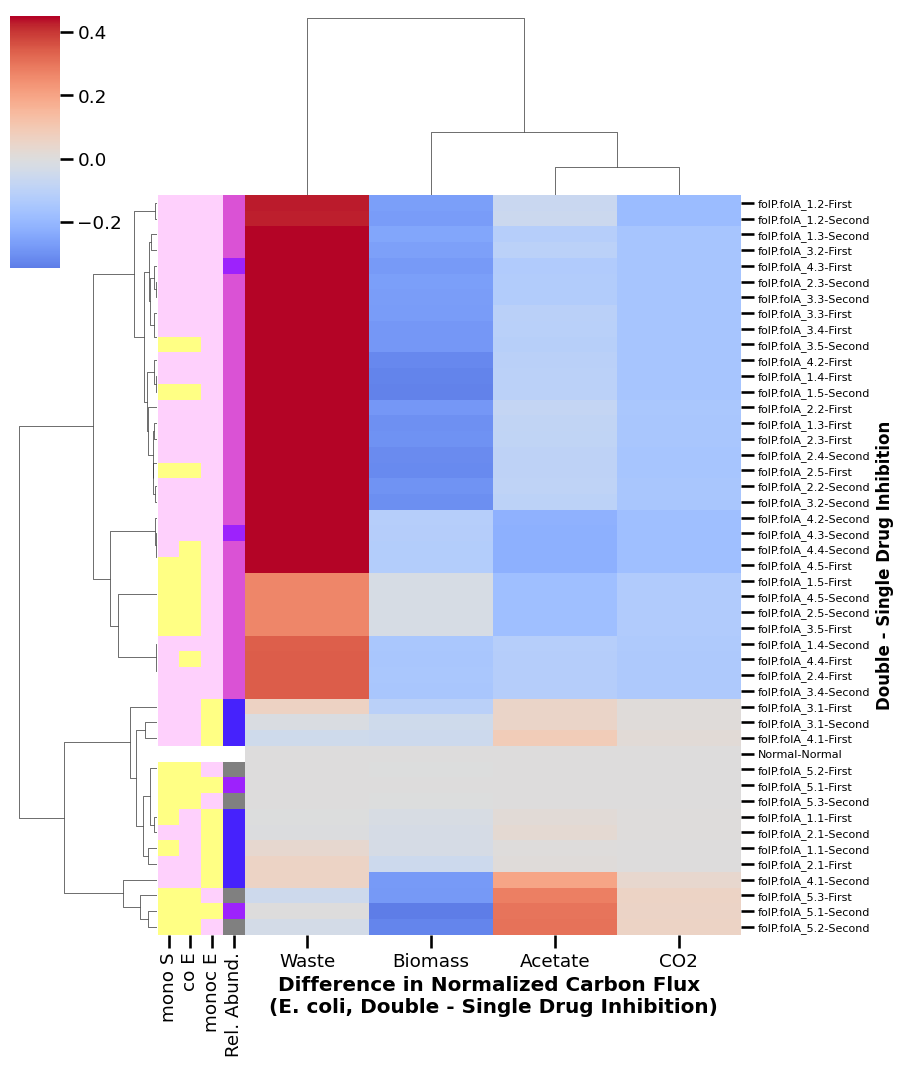

In [24]:
sns.set_context('talk', font_scale=0.8)
fig = plt.figure()
clustered = sns.clustermap(fs_sub_change.loc[:,p_cols] 
            , row_colors=generate_row_colors(fs_sub_change)
            # , standard_scale=1
            , center=0
            , yticklabels=True
            , figsize=(10, 14)
            , vmax=0.45
            , cmap='coolwarm')
relabel_clustermap(clustered)

Add associated legend

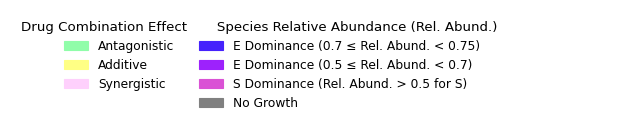

In [31]:
get_row_color_legend()

Kernel density estimation using normalized carbon flux data

Index(['Drug Combination Effect', 'reaction', 'Normalized Carbon Flux'], dtype='object')


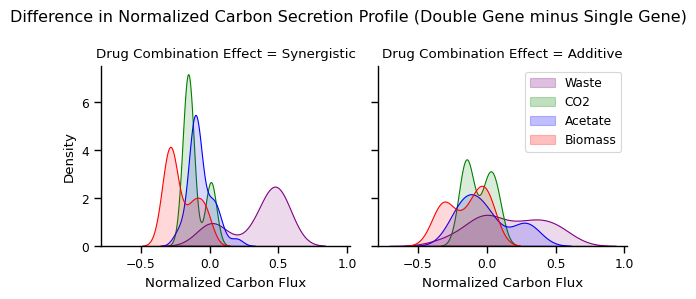

In [26]:
fs_plot = get_fs_kde_plot(fs_change)
plot_kde(fs_plot, col_prefix='percent_')

Heatmap of flux quantity per drug pair only

['E', 'slight E', 'S', 'No growth']


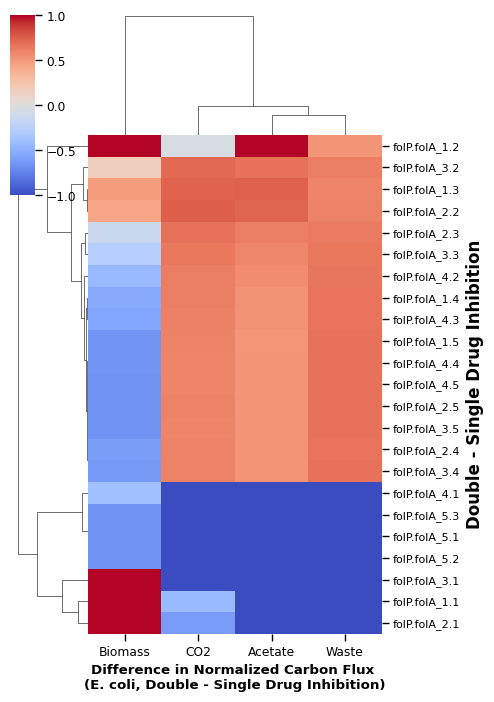

In [ ]:
p_cols = ['percent_BIOMASS_Ec_iML1515_core_75p37M', 'percent_EX_bulk_ac_e', 'percent_EX_co2_e', 'percent_Waste']
total_carbon_cols = [ele.replace('percent', 'plot_total_carbon') for ele in p_cols]  
sns.set_context('paper')

plot_cluster_disagree = assign_plot_total_E_wide(carbon_allocation_E_wide,log_waste=False).dropna(how='any')
row_colors = generate_row_colors(plot_cluster_disagree, color=[ '#4622fc','#9d22fc', '#da52d5', 'grey'])
clustered = sns.clustermap(plot_cluster_disagree[total_carbon_cols] # flux magnitude
            #    ,row_colors=row_colors
               , z_score=1
               , figsize=(5, 10)
               , vmin=-1, vmax=1
               , cmap='coolwarm')

relabel_clustermap(clustered)